# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_index.csv
https://www.kaggle.com/datasets/rajkumarpandey02/tesla-inc-tsla-stock-price
https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction
https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data
https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time
https://www.kaggle.com/datasets/kalilurrahman/facebook-stock-data-live-and-latest
https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

Import the necessary libraries and create your dataframe(s).

In [1]:
#import needed libraires with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read in dataset giving aliases same as their respective NASDAQ ticker symbol for stocks to compare it with S&P index.
spy = pd.read_csv("sp500_index.csv")
amzn = pd.read_csv("Amazon.csv")
aapl = pd.read_csv("Apple.csv")
nflx = pd.read_csv("Netflix.csv")
tsla = pd.read_csv("Tesla.csv")
meta = pd.read_csv("Facebook.csv")
msft = pd.read_csv("Microsoft.csv")

# Want to see if the dataframe was properly imported and kind of data is stored in each column
spy.info()
amzn.info()
aapl.info()
nflx.info()
tsla.info()
meta.info()
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2520 non-null   object 
 1   S&P500  2520 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   -----

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#checking for missing data
spy.isna().sum()


Date      0
S&P500    0
dtype: int64

In [3]:
#put them in same order of earliest to latest
spy.sort_values(by='Date')

,Date,S&P500
0,2013-04-01,1562.17
1,2013-04-02,1570.25
2,2013-04-03,1553.69
3,2013-04-04,1559.98
4,2013-04-05,1553.28
...,...,...
2515,2023-03-27,3977.53
2516,2023-03-28,3971.27
2517,2023-03-29,4027.81
2518,2023-03-30,4050.83


In [4]:
#checking for missing data
amzn.isna().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#put them in same order of earliest to latest
amzn.sort_values(by='Date')

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [6]:
#checking for missing data
aapl.isna().sum()


Date       0
Close      0
 Volume    0
 Open      0
 High      0
 Low       0
dtype: int64

In [7]:
#put them in same order of earliest to latest
aapl.sort_values(by='Date')

,Date,Close,Volume,Open,High,Low
219,1/10/2011,48.92,"111,939,414.00",48.40,49.03,48.17
471,1/10/2012,60.46,"64,474,443.00",60.84,60.86,60.21
722,1/10/2013,74.79,"149,986,665.00",75.51,75.53,73.65
974,1/10/2014,76.13,"76,235,553.00",77.12,77.26,75.87
1729,1/10/2017,119.11,"24,432,660.00",118.77,119.38,118.30
...,...,...,...,...,...,...
888,9/9/2013,72.31,"84,479,315.00",72.14,72.56,71.93
1140,9/9/2014,97.99,"189,419,500.00",99.08,103.08,96.14
1392,9/9/2015,110.15,"84,757,780.00",113.76,114.02,109.77
1645,9/9/2016,103.13,"46,461,610.00",104.64,105.72,103.13


In [8]:
#Change Format for date to match other dataset 
aapl['Date']=pd.to_datetime(aapl.Date).dt.date.astype(str)

In [9]:
#put them in same order of earliest to latest
aapl.sort_values(by='Date')

,Date,Close,Volume,Open,High,Low
0,2010-03-01,29.86,"137,312,041.00",29.39,29.93,29.35
1,2010-03-02,29.84,"141,486,282.00",29.99,30.12,29.68
2,2010-03-03,29.90,"92,846,488.00",29.85,29.98,29.71
3,2010-03-04,30.10,"89,591,907.00",29.90,30.13,29.80
4,2010-03-05,31.28,"224,647,427.00",30.71,31.39,30.66
...,...,...,...,...,...,...
2513,2020-02-24,298.18,"55,548,830.00",297.26,304.18,289.23
2514,2020-02-25,288.08,"57,668,360.00",300.95,302.53,286.13
2515,2020-02-26,292.65,"49,678,430.00",286.53,297.88,286.50
2516,2020-02-27,273.52,"80,151,380.00",281.10,286.00,272.96


In [10]:
#checking for missing data
nflx.isna().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#put them in same order of earliest to latest
nflx.sort_values(by='Date')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [12]:
#checking for missing data
tsla.isna().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
#put them in same order of earliest to latest
tsla.sort_values(by='Date')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500
...,...,...,...,...,...,...,...
3019,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500
3020,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
3021,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
3022,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300


In [14]:
#checking for missing data
meta.isna().sum()



Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [15]:
#put them in same order of earliest to latest
meta.sort_values(by='Date')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...,...
2354,2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800,0,0
2355,2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300,0,0
2356,2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200,0,0
2357,2021-09-30,340.450012,342.799988,338.149994,339.390015,16547100,0,0


In [16]:
# checking if 'Dividend' column has any value or all is zero
meta['Dividends'].sum()

0

In [17]:
# checking if 'Stock Splits' column has any value or all is zero
meta['Stock Splits'].sum()

0

In [18]:
# since columns 'Dividend' and 'Stock Splits' do not have any value dropping both the columns
meta.drop(columns=['Dividends'],inplace=True,axis=1)


In [19]:
meta.drop(columns=['Stock Splits'],inplace=True,axis=1)

In [20]:
meta.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200


In [21]:
#checking for missing data
msft.isna().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [22]:
#put them in same order of earliest to latest
msft.sort_values(by='Date')

,Date,Open,High,Low,Close,Volume
448,1/10/2017 16:00:00,62.73,63.07,62.28,62.62,18593004
700,1/10/2018 16:00:00,87.86,88.19,87.41,87.82,18652201
951,1/10/2019 16:00:00,103.22,103.75,102.38,103.60,30067556
1203,1/10/2020 16:00:00,162.82,163.22,161.18,161.34,20733946
196,1/11/2016 16:00:00,52.51,52.85,51.46,52.30,36943756
...,...,...,...,...,...,...
1369,9/8/2020 16:00:00,206.50,210.03,202.20,202.66,52924330
111,9/9/2015 16:00:00,44.21,44.40,42.91,43.07,33469485
364,9/9/2016 16:00:00,56.79,57.52,56.21,56.21,35113934
1117,9/9/2019 16:00:00,139.59,139.75,136.46,137.52,25773932


In [23]:
#Change Format for date to match other dataset 
msft['Date']=pd.to_datetime(msft.Date).dt.date.astype(str)

In [24]:
msft.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [25]:
# since will be combining 7 data frame need to find earliest data and latest data available, 
print(' spy date range: ',spy['Date'].min(),' : ',spy['Date'].max(),'\n'
     ,'amzn date range: ',amzn['Date'].min(),' : ',amzn['Date'].max(),'\n'
     ,'aapl date range: ',aapl['Date'].min(),' : ',aapl['Date'].max(),'\n'
     ,'nflx date range: ',nflx['Date'].min(),' : ',nflx['Date'].max(),'\n'
     ,'tsla date range: ',tsla['Date'].min(),' : ',tsla['Date'].max(),'\n'
     ,'meta date range: ',meta['Date'].min(),' : ',meta['Date'].max(),'\n'
     ,'msft date range: ',msft['Date'].min(),' : ',msft['Date'].max(),'\n')

 spy date range:  2013-04-01  :  2023-03-31 
 amzn date range:  1997-05-15  :  2021-10-27 
 aapl date range:  2010-03-01  :  2020-02-28 
 nflx date range:  2018-02-05  :  2022-02-04 
 tsla date range:  2011-01-03  :  2023-01-06 
 meta date range:  2012-05-18  :  2021-10-01 
 msft date range:  2015-04-01  :  2021-03-31 



(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '2019-04-08'),
  Text(0.0, 0, '2015-04-01'),
  Text(500.0, 0, '2017-03-27'),
  Text(1000.0, 0, '2019-03-22'),
  Text(1500.0, 0, '2021-03-17'),
  Text(2000.0, 0, ''),
  Text(2500.0, 0, ''),
  Text(3000.0, 0, '')])

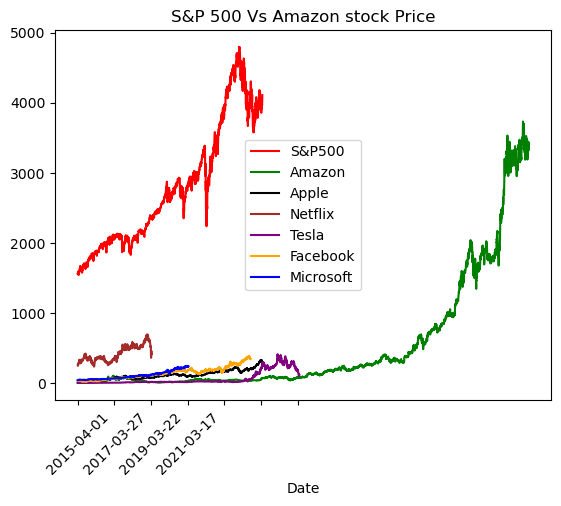

In [26]:
# comparing individual stock againt S&P500
gr = spy.plot(kind='line',x="Date", y="S&P500", color="Red", title = 'S&P 500 Vs Amazon stock Price');
amzn.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Amazon', color="green");
aapl.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Apple', color="black");
nflx.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Netflix', color="brown");
tsla.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Tesla', color="purple");
meta.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Facebook', color="orange");
msft.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Microsoft', color="blue");
plt.xticks(rotation = 45)

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [27]:
# Amazon data is since 1997 rest of them are from 2010 onwards and Netflix is only from 2018 so taking data from 2018 Jan till 2022 Jan
spy = spy.loc[(spy['Date'] > '2018-01-01') & (spy['Date'] < '2020-02-28')]
amzn  = amzn.loc[(amzn['Date'] > '2018-01-01') & (amzn['Date'] < '2020-02-28')]
aapl  = aapl.loc[(aapl['Date'] > '2018-01-01') & (aapl['Date'] < '2020-02-28')]
nflx  = nflx.loc[(nflx['Date'] > '2018-01-01') & (nflx['Date'] < '2020-02-28')]
tsla  = tsla.loc[(tsla['Date'] > '2018-01-01') & (tsla['Date'] < '2020-02-28')]
meta  = meta.loc[(meta['Date'] > '2018-01-01') & (meta['Date'] < '2020-02-28')]
msft  = msft.loc[(msft['Date'] > '2018-01-01') & (msft['Date'] < '2020-02-28')]

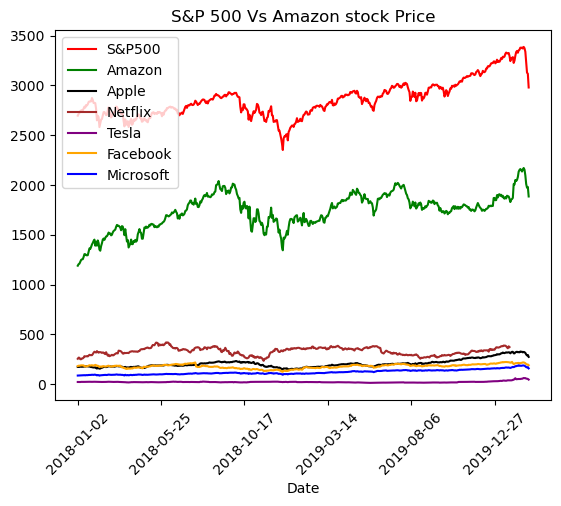

In [28]:
# comparing individual stock againt S&P500
gr = spy.plot(kind='line',x="Date", y="S&P500", color="Red", title = 'S&P 500 Vs Amazon stock Price');
amzn.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Amazon', color="green");
aapl.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Apple', color="black");
nflx.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Netflix', color="brown");
tsla.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Tesla', color="purple");
meta.plot(ax = gr, kind='line',x="Date", y="Close",label = 'Facebook', color="orange");
msft.plot(ax = gr, kind='line',x="Date", y="Close", label = 'Microsoft', color="blue");
plt.xticks(rotation = 45);

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [29]:
# In order to match data, inconsistent Date column was already fixed for Apple and Microsoft database

In [31]:
spy.to_csv("spy_cleaned.csv")
amzn.to_csv("amzn_cleaned.csv")
aapl.to_csv("aapl_cleaned.csv")
nflx.to_csv("nflx_cleaned.csv")
tsla.to_csv("tsla_cleaned.csv")
meta.to_csv("meta_cleaned.csv")
msft.to_csv("msft_cleaned.csv")

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
- All 7 dataset were complete with no null values
- One table had 2 columns with '0' value so we dropped it.
- 2 tables date format was different
- Not all the data range was same, so trying to compare common range

2. Did the process of cleaning your data give you new insights into your dataset?
- Dataset may not be empty but with no value 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
-2 datasets had dates in different format